In [35]:
from tensorflow import keras
from tensorflow.keras import layers

# This is the size of our encoded representations
encoding_dim = 64  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [36]:
# This is our input image
# input_img = keras.Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

In [37]:
# This model maps an input to its encoded representation
# encoder = keras.Model(input_img, encoded)

In [38]:
# This is our encoded (32-dimensional) input
# encoded_input = keras.Input(shape=(encoding_dim,))
# # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # Create the decoder model
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [39]:
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
from keras.datasets import mnist
import numpy
(x_train, _), (x_test, _) = mnist.load_data()

In [41]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), numpy.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), numpy.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [42]:
# autoencoder.fit(x_train, x_train,
#                 epochs=50,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [43]:
# # Encode and decode some digits
# # Note that we take them from the *test* set
# encoded_imgs = encoder.predict(x_test)
# decoded_imgs = decoder.predict(encoded_imgs)

In [44]:
# # Use Matplotlib (don't ask)
# import matplotlib.pyplot as pyplot

# n = 20  # How many digits we will display
# pyplot.figure(figsize=(20, 4))
# for i in range(n):
#     # Display original
#     ax = pyplot.subplot(2, n, i + 1)
#     pyplot.imshow(x_test[i].reshape(28, 28))
#     pyplot.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display reconstruction
#     ax = pyplot.subplot(2, n, i + 1 + n)
#     pyplot.imshow(decoded_imgs[i].reshape(28, 28))
#     pyplot.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# pyplot.show()

In [45]:
# n = 20  # How many digits we will display
# pyplot.figure(figsize=(20, 4))
# for i in range(n):
#     # Display original
#     ax = pyplot.subplot(2, n, i + 1)
#     pyplot.imshow(x_test[i].reshape(28, 28))
#     pyplot.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # Display reconstruction
#     ax = pyplot.subplot(2, n, i + 1 + n)
#     pyplot.imshow(encoded_imgs[i].reshape(encoding_dim, 1), cmap='viridis')
#     # pyplot.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# pyplot.show()

In [46]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(24, activation='sigmoid')(input_img)
encoded = layers.Dense(8, activation='sigmoid')(encoded)
decoded = layers.Dense(24, activation='sigmoid')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

In [47]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=250,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/250
235/235 [==============================] - 4s 11ms/step - loss: 0.3864 - val_loss: 0.2806
Epoch 2/250
235/235 [==============================] - 2s 10ms/step - loss: 0.2719 - val_loss: 0.2672
Epoch 3/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2659 - val_loss: 0.2647
Epoch 4/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2644 - val_loss: 0.2637
Epoch 5/250
235/235 [==============================] - 2s 10ms/step - loss: 0.2637 - val_loss: 0.2632
Epoch 6/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 7/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2628 - val_loss: 0.2623
Epoch 8/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2622 - val_loss: 0.2614
Epoch 9/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2597 - val_loss: 0.2567
Epoch 10/250
235/235 [==============================] - 2s 9ms/step - loss: 0.2539 - val

In [48]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


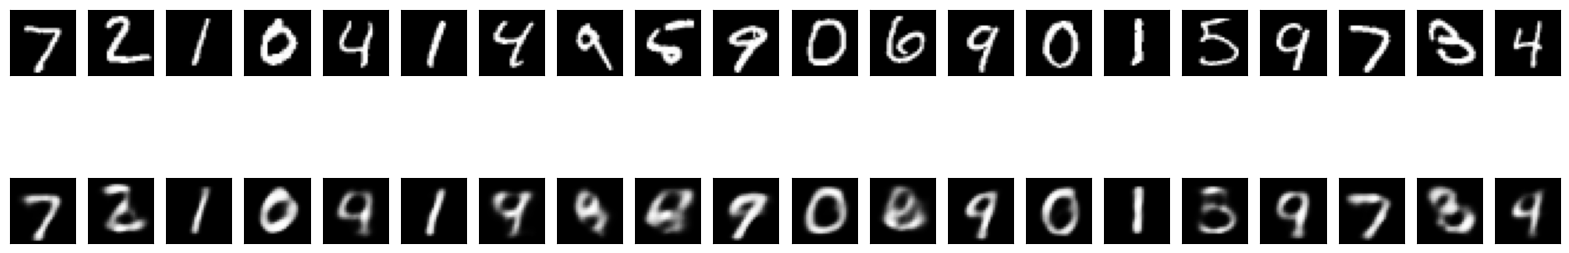

In [49]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as pyplot

n = 20  # How many digits we will display
pyplot.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_imgs[i].reshape(28, 28))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()